# Example of using the deep_inv_opt package

In [1]:
# Copyright (C) to Yingcong Tan, Andrew Delong, Daria Terekhov. All Rights Reserved.

import numpy as np
import deep_inv_opt as io
import deep_inv_opt.plot as iop

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.max_open_warning'] = 0  # Let the plots flow!
%matplotlib inline

### Define a simple LP with 3 inequality constraints and 1 equality constraint

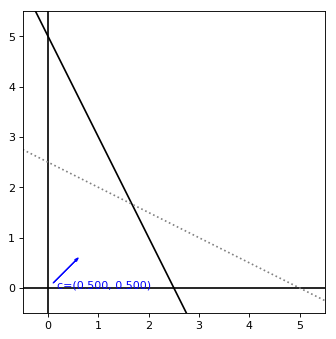

In [2]:
# Define an LP instance. Each is just a torch.DoubleTensor object.
c_init = io.tensor([[0.5],
                    [0.5]])
A_ub = io.tensor([[-1.0,  0.0],
                  [ 0.0, -1.0],
                  [ 2.0,  1.0]])
b_ub = io.tensor([[ 0.0],
                  [ 0.0],
                  [ 5.0]])
A_eq = io.tensor([[1.0, 2.0]])
b_eq = io.tensor([[5.0]])

xylim = ((-0.5, 5.5), (-0.5, 5.5))
iop.plot_linprog(c_init, A_ub, b_ub, A_eq, b_eq, xylim);

### Run forward solver and plot the central path

tensor([[1.5113e-05],
        [2.5000e+00]], dtype=torch.float64)

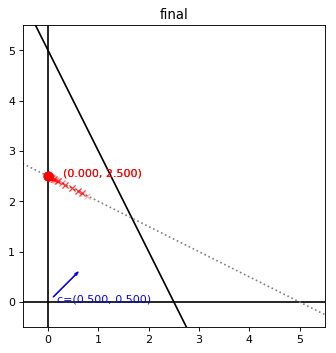

In [3]:
io.linprog(c_init, A_ub, b_ub, A_eq, b_eq,
           callback=iop.linprog_path_plotter(xylim))

### Find a cost vector that minimizes squared error loss with respect to a target point

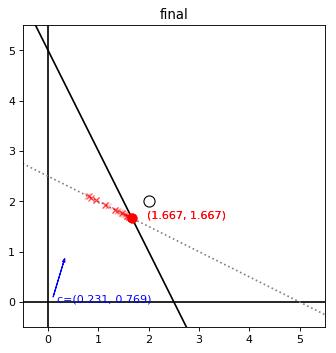

In [4]:
# Define a single point target
x_target = io.tensor([[2.0],
                      [2.0]])

# Inverse solve for c only, and pull out just the new c vector from the result
c, *_ = io.inverse_linprog(x_target, c_init, A_ub, b_ub, A_eq, b_eq)

# Forward solve with the new c vector and plot the new central path
io.linprog(c, A_ub, b_ub, A_eq, b_eq, callback=iop.linprog_path_plotter(xylim))
plt.plot([2], [2], 'ok', markerfacecolor='none', markersize=10);

### Same as above, except plot the intermediate steps of inverse optimization

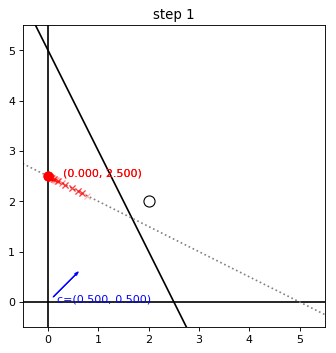

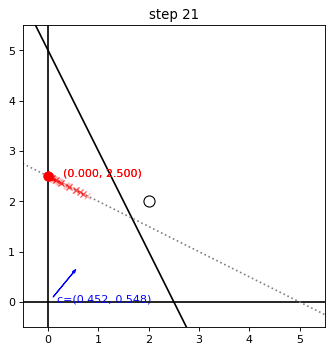

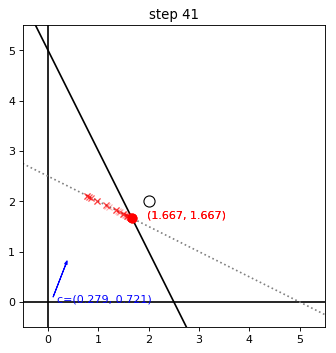

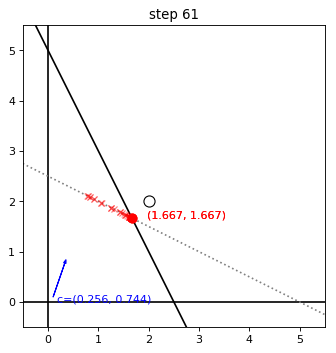

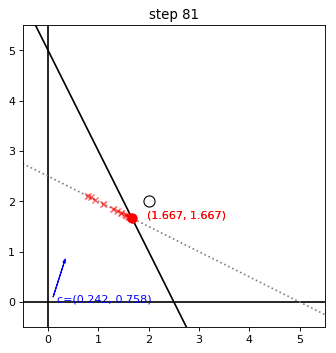

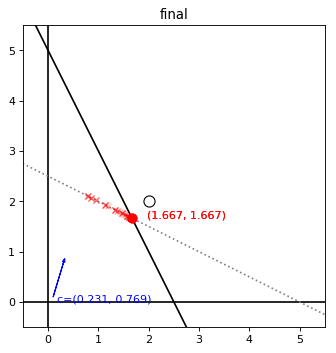

In [5]:
# Try plotting the steps of inverse, but only every 10th step
c, *_ = io.inverse_linprog(x_target, c_init, A_ub, b_ub, A_eq, b_eq,
                           callback=iop.inverse_linprog_step_plotter(xylim, frequency=20))